In [1]:
import mne
import matplotlib.pyplot as plt
from scipy import fft
import numpy as np

path_eeg = '/home/david/eeg_informed_fmri/datasets/'

dataset = '01/EEG/'

individual = '32/'

vhdr_file = 'raw/20130410320002.vhdr'

complete_path = path_eeg + dataset + individual + vhdr_file

In [2]:
eeg = mne.io.read_raw_brainvision(complete_path, preload=True)

Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/32/raw/20130410320002.vhdr...
Setting channel info structure...
Reading 0 ... 3982899  =      0.000 ...   796.580 secs...


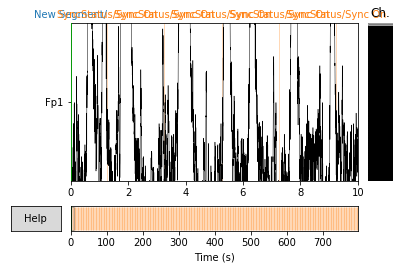

In [3]:
eeg.plot(n_channels=1)
plt.show()

In [4]:
print(eeg.ch_names)

#channels = [eeg.ch_names[2]]
#eeg.pick_channels(channels)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']


In [5]:
data, times = eeg[0][:]


fs = 5000
T = len(times)/fs

minute_length = fs*60

In [6]:
eeg = eeg.load_data()

Effective window size : 0.400 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-7-6af5ff79c928>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  dB=False, estimate='amplitude')


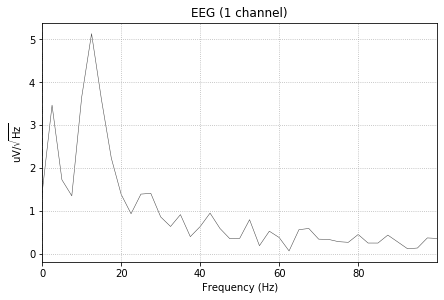

In [7]:
eeg.plot_psd(fmin=0, fmax=100, tmin=times[0], tmax=times[2000], picks=[eeg.ch_names[0]], 
             dB=False, estimate='amplitude')

plt.show()

In [8]:
data, times = eeg[0][:]

data = data[0]

def compute_fft(channel, fs=128):
    N = int(len(channel)/2)
    
    fft1 = fft(channel)
    
    return fft1[range(int(N/2))]


fft1 = compute_fft(data)

995725


/home/david/anaconda3/envs/fmri_eeg/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


Text(0.5, 0, 'Frequency (Hz)')

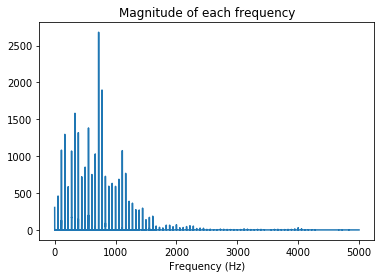

In [9]:
N = int(len(data)/2)
f = np.linspace (0, fs, N/2)
print(len(f))
plt.figure(1)
plt.plot (f, abs (fft1))
plt.title ('Magnitude of each frequency')
plt.xlabel ('Frequency (Hz)')

In [11]:
eeg.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, ...
    chs : list | 64 items (EEG: 64)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.015915494309189534 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : tuple | 2013-04-10 10:25:44 GMT
    nchan : int | 64
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 5000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplot

In [12]:
sample = data[0][int(2*minute_length):3*minute_length]

5000
60.0


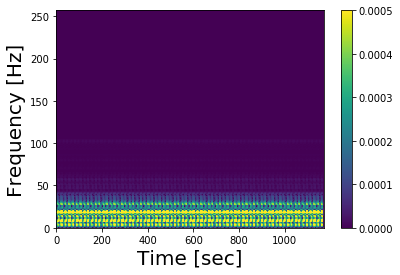

In [13]:
from scipy.signal import stft

print(fs)
print(len(sample)/fs)

f, t, Zxx = stft(sample, fs, nperseg=512)
amplitude = f[-1]
im = plt.pcolormesh(abs(Zxx), vmin=0, vmax=0.0005)

plt.colorbar(im)
plt.ylabel('Frequency [Hz]', fontsize=20)
plt.xlabel('Time [sec]', fontsize=20)
plt.show()


###### from sklearn.preprocessing import scale

data, times = eeg[0][:]
data = data[0]

## Getting into the MNE source code

#### plot()

In [16]:
eeg

<RawBrainVision  |  20130410320002.eeg, n_channels x n_times : 64 x 3982900 (796.6 sec), ~1.90 GB, data loaded>

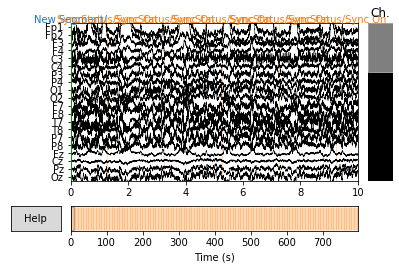

In [17]:
eeg.plot()
plt.show()

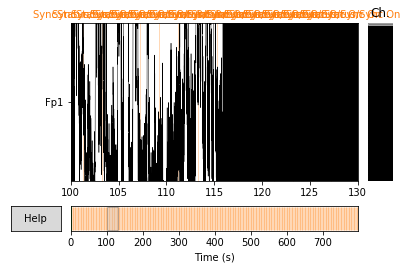

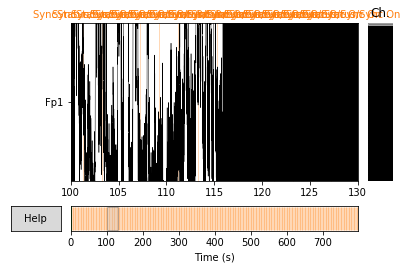

In [18]:
from mne.io.base import BaseRaw


eeg.plot(events=None, duration=30.0, start=100, n_channels=1,
             bgcolor='w', color=None, bad_color=(0.8, 0.8, 0.8),
             event_color='cyan', scalings=None, remove_dc=True, order=None,
             show_options=False, title=None, show=True, block=False,
             highpass=None, lowpass=None, filtorder=4, clipping=None,
             show_first_samp=True, proj=True, group_by='type',
             butterfly=False, decim='auto', noise_cov=None, event_id=None)

As seen in the plot above, the signal indeed has the behaviour matplotlib and R plots were showing
Now the question is: why the behaviour after the 115 seconds mark?

### Let's check how it computes the PSD plot

In [19]:
from mne.viz import plot_raw_psd

Effective window size : 0.410 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-20-1b854ae4f6fc>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  plot_raw_psd(eeg, picks=[eeg.ch_names[0]], verbose=1)


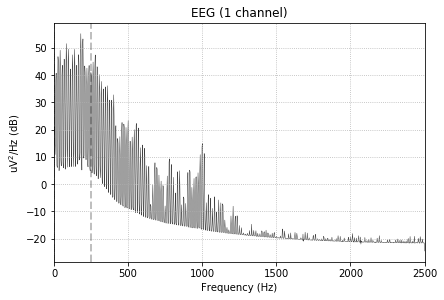

NameError: name 'psd_welch' is not defined

In [20]:
plot_raw_psd(eeg, picks=[eeg.ch_names[0]], verbose=1)

psd_welch(eeg, tmin=tmin, tmax=tmax, picks=picks,
                                fmin=fmin, fmax=fmax, proj=proj, n_fft=n_fft,
                                n_overlap=n_overlap, n_jobs=n_jobs,
                                reject_by_annotation=reject_by_annotation)

In [65]:
from mne.time_frequency.psd import psd_welch
import matplotlib.pyplot as plt
import numpy as np

def stft(raw, window_size=2, channel=None, start_time=None, stop_time=None):
    if(start_time == None):
        start_time = int(raw.times[0])
    if(stop_time == None):
        stop_time = int(raw.times[-1])
    t = []
    
    Z = []
    for time in range(start_time, stop_time, window_size):
        psds, freqs = psd_welch(eeg, picks=[eeg.ch_names[channel]],
                                        fmin=0, fmax=80, tmin=time, tmax=time+window_size)
        #average
        Z += [list(np.mean(psds, axis=0))]
        t += [time]
        
    return freqs, np.transpose(np.array(Z)), t

In [48]:
f, Z, t = stft(eeg, channel=0)

Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective wind

Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective window size : 0.200 (s)
Effective wind

In [49]:
Z.shape

(17, 364)

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80.]
3.119661949916235e-08


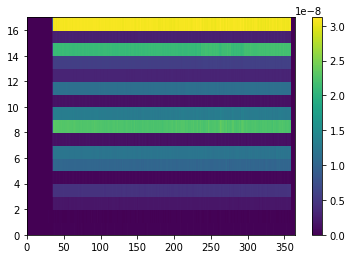

In [50]:
amplitude = np.max(Z)
print(f)
print(amplitude)
im = plt.pcolormesh(abs(Z), vmin=0, vmax=amplitude)

plt.colorbar(im)
plt.show()

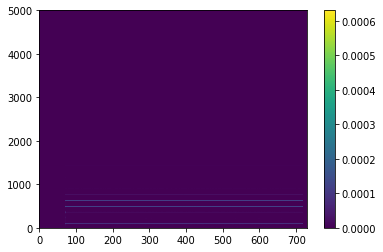

In [47]:
from scipy.signal import stft as scipy_stft
y, _ = eeg[0][:]

f, t, Zxx = scipy_stft(y, fs=fs, nperseg=fs*2)
amplitude = np.max(abs(Zxx))

Zxx = Zxx.reshape((Zxx.shape[1], Zxx.shape[2]))
im = plt.pcolormesh(abs(Zxx), vmin=0, vmax=amplitude)

plt.colorbar(im)

plt.show()

['20130410320002_Segmentation_bin.dat', '20130410320002_Segmentation_bin.vhdr', '20130410320002_Segmentation_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/32/export/20130410320002_Segmentation_bin.vhdr...
Setting channel info structure...
Reading 0 ... 162022  =      0.000 ...   648.088 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


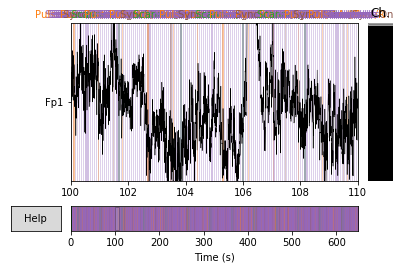

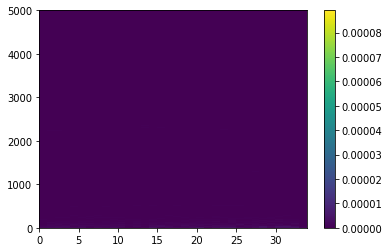

['20130424350002_Pulse_Artifact_Correction_bin.dat', '20130424350002_Pulse_Artifact_Correction_bin.vhdr', '20130424350002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/35/export/20130424350002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 197234  =      0.000 ...   788.936 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


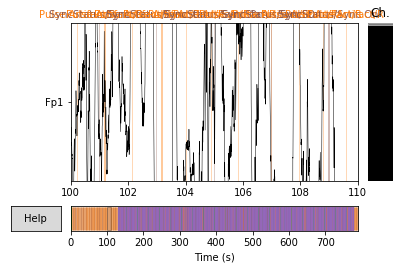

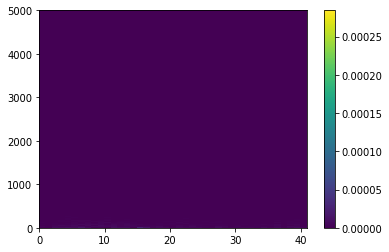

['20130425360002_Pulse_Artifact_Correction_bin.dat', '20130425360002_Pulse_Artifact_Correction_bin.vhdr', '20130425360002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/36/export/20130425360002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 181949  =      0.000 ...   727.796 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


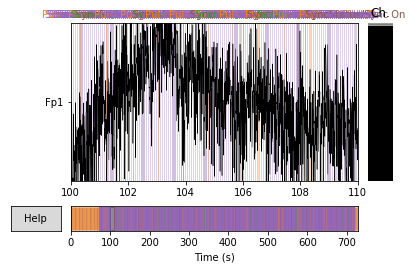

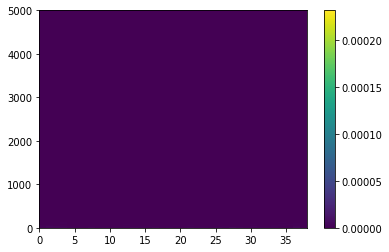

['20130426370002_Pulse_Artifact_Correction_bin.dat', '20130426370002_Pulse_Artifact_Correction_bin.vhdr', '20130426370002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/37/export/20130426370002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 195159  =      0.000 ...   780.636 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


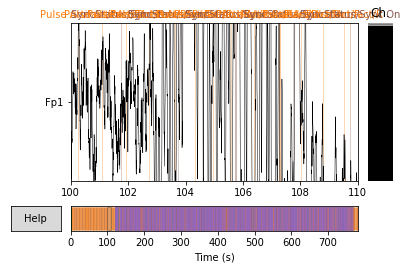

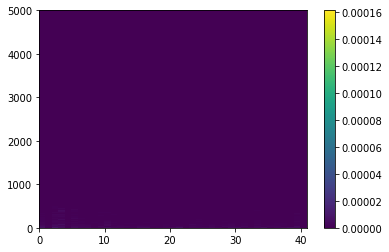

['20130105380002_Pulse_Artifact_Correction_bin.dat', '20130105380002_Pulse_Artifact_Correction_bin.vhdr', '20130105380002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/38/export/20130105380002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 179384  =      0.000 ...   717.536 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


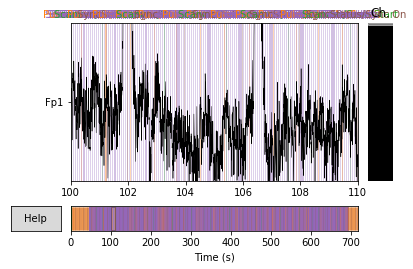

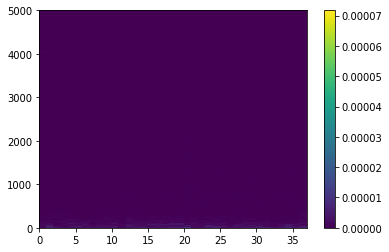

['20130501390002_Pulse_Artifact_Correction_bin.dat', '20130501390002_Pulse_Artifact_Correction_bin.vhdr', '20130501390002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/39/export/20130501390002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 182129  =      0.000 ...   728.516 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


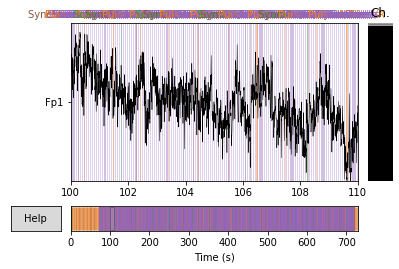

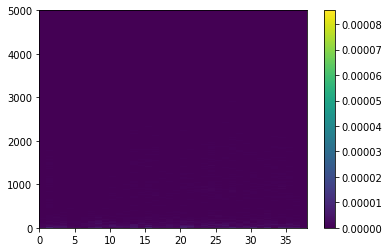

['20130510400002_Pulse_Artifact_Correction_bin.dat', '20130510400002_Pulse_Artifact_Correction_bin.vhdr', '20130510400002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/40/export/20130510400002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 173914  =      0.000 ...   695.656 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


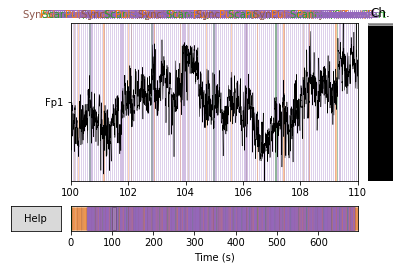

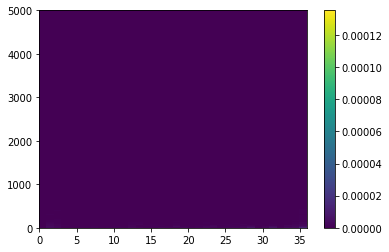

['20130523420002_Pulse_Artifact_Correction_bin.dat', '20130523420002_Pulse_Artifact_Correction_bin.vhdr', '20130523420002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/42/export/20130523420002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 184909  =      0.000 ...   739.636 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


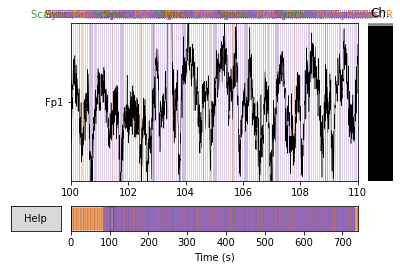

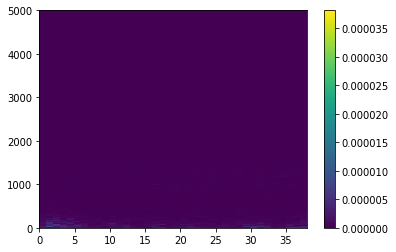

['20130529430002_Pulse_Artifact_Correction_bin.dat', '20130529430002_Pulse_Artifact_Correction_bin.vhdr', '20130529430002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/43/export/20130529430002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 170594  =      0.000 ...   682.376 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


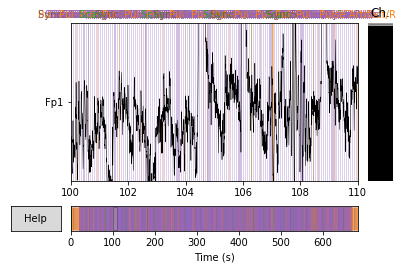

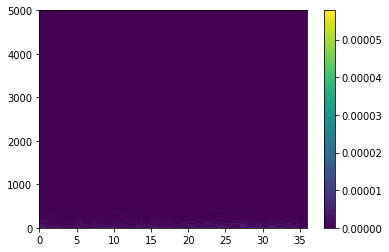

['20130605440002_Pulse_Artifact_Correction_bin.dat', '20130605440002_Pulse_Artifact_Correction_bin.vhdr', '20130605440002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/44/export/20130605440002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 169854  =      0.000 ...   679.416 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


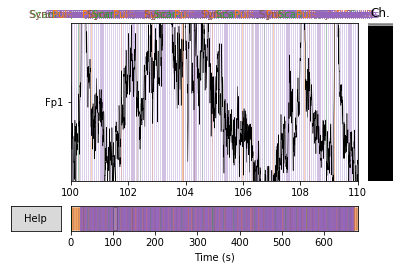

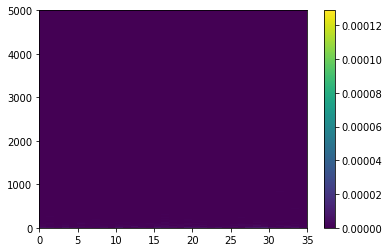

['20130627450002_Pulse_Artifact_Correction_bin.dat', '20130627450002_Pulse_Artifact_Correction_bin.vhdr', '20130627450002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/45/export/20130627450002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 168099  =      0.000 ...   672.396 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


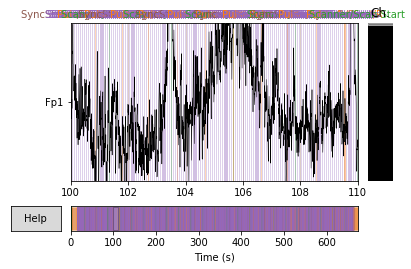

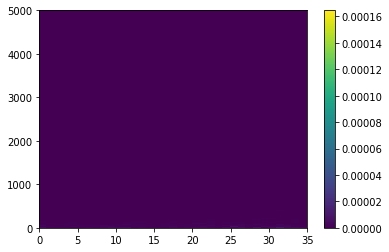

['20130703460002_Pulse_Artifact_Correction_bin.dat', '20130703460002_Pulse_Artifact_Correction_bin.vhdr', '20130703460002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/46/export/20130703460002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 172264  =      0.000 ...   689.056 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


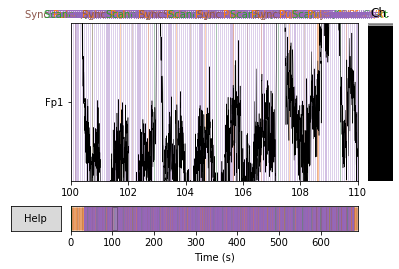

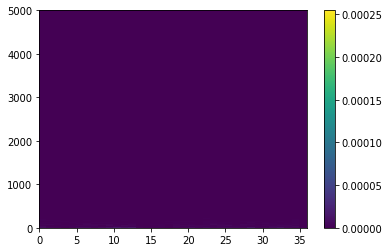

['20130710470002_Pulse_Artifact_Correction_bin.dat', '20130710470002_Pulse_Artifact_Correction_bin.vhdr', '20130710470002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/47/export/20130710470002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 182594  =      0.000 ...   730.376 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


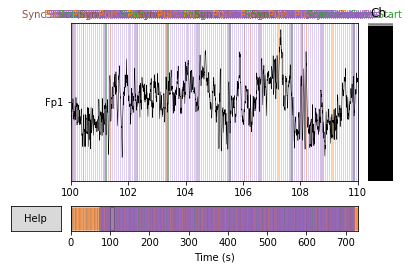

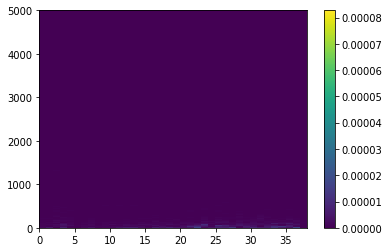

['20130717480002_Pulse_Artifact_Correction_bin.dat', '20130717480002_Pulse_Artifact_Correction_bin.vhdr', '20130717480002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/48/export/20130717480002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 171739  =      0.000 ...   686.956 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


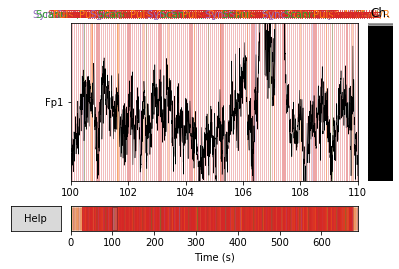

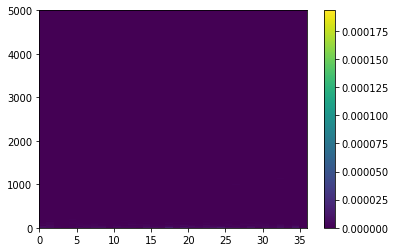

['20130918490002_Pulse_Artifact_Correction_bin.dat', '20130918490002_Pulse_Artifact_Correction_bin.vhdr', '20130918490002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/49/export/20130918490002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 167579  =      0.000 ...   670.316 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


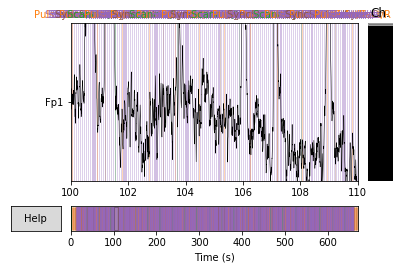

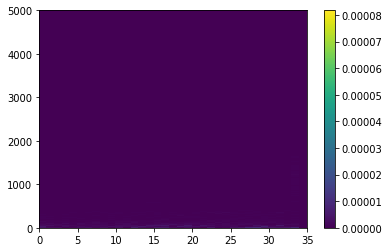

['20131003_500002_Pulse_Artifact_Correction_bin.dat', '20131003_500002_Pulse_Artifact_Correction_bin.vhdr', '20131003_500002_Pulse_Artifact_Correction_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/50/export/20131003_500002_Pulse_Artifact_Correction_bin.vhdr...
Setting channel info structure...
Reading 0 ... 168019  =      0.000 ...   672.076 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG', 'O9', 'O10']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


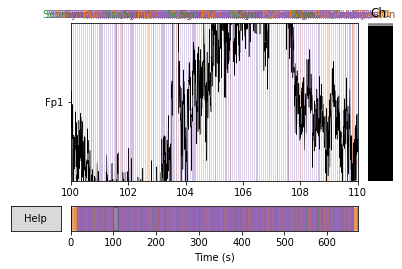

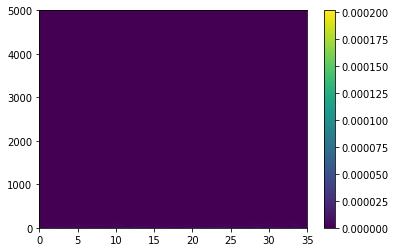

In [62]:
import os
from os import listdir
from os.path import isfile, join, isdir

def get_individual(individual=0):
    path_eeg = '/home/david/eeg_informed_fmri/datasets/'

    dataset = '01/EEG/'
    
    individuals = sorted([f for f in listdir(path_eeg+dataset) if isdir(join(path_eeg+dataset, f))])
    
    individual = individuals[individual]
    
    path = path_eeg + dataset + individual + '/export/'
    brainvision_files = sorted([f for f in listdir(path) if isfile(join(path, f))])
    print(brainvision_files)
    vhdr_file = brainvision_files[1]

    complete_path = path + vhdr_file
    
    return mne.io.read_raw_brainvision(complete_path, preload=True)


for i in range(16):
    eeg = get_individual(i)

    eeg.plot(n_channels=1, start=100)


    from scipy.signal import stft as scipy_stft
    y, _ = eeg[0][:]

    f, t, Zxx = scipy_stft(y, fs=fs, nperseg=fs*2)
    amplitude = np.max(abs(Zxx))

    Zxx = Zxx.reshape((Zxx.shape[1], Zxx.shape[2]))
    im = plt.pcolormesh(abs(Zxx), vmin=0, vmax=amplitude)

    plt.colorbar(im)

    plt.show()

In [63]:
eeg = get_individual(0)

['20130410320002_Segmentation_bin.dat', '20130410320002_Segmentation_bin.vhdr', '20130410320002_Segmentation_bin.vmrk']
Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/32/export/20130410320002_Segmentation_bin.vhdr...
Setting channel info structure...
Reading 0 ... 162022  =      0.000 ...   648.088 secs...


<ipython-input-62-e833b99ee015>:21: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


### Compute STFT

Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective wind

Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective wind

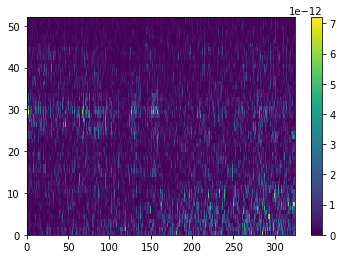

In [116]:
f, Z, t = stft(eeg, channel=0)

amplitude = np.max(Z[30:])


im = plt.pcolormesh(abs(Z)[30:], vmin=0, vmax=amplitude)

plt.colorbar(im)
plt.show()


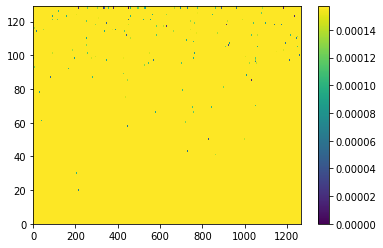

In [137]:
from scipy.signal import stft as scipy_stft
y, _ = eeg[0][:]

f, t, Zxx = scipy_stft(y, fs=fs, nperseg=fs*2)
amplitude = np.max(abs(Zxx))

Zxx = Zxx.reshape((Zxx.shape[1], Zxx.shape[2]))

from sklearn.preprocessing import normalize
Zxx = normalize(abs(Zxx), axis=0, norm='l2')

im = plt.pcolormesh(abs(Zxx), vmin=0, vmax=amplitude)

plt.colorbar(im)

plt.show()

### Compute FFT

In [301]:
from scipy import fft

y, times = eeg[0][:]
y = y[0]

fs = eeg.info['sfreq']

/home/david/anaconda3/envs/fmri_eeg/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'Frequency (Hz)')

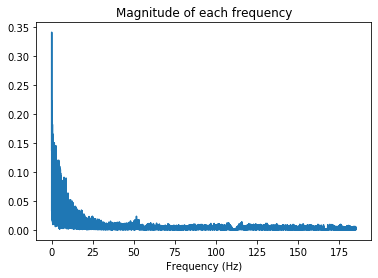

In [305]:
def compute_fft(channel, fs=128):
    N = int(len(channel)/2)
    
    fft1 = fft(channel)
    
    return fft1[range(int(N/2))]

fs = eeg.info['sfreq']
fft1 = compute_fft(y, fs=fs)
N = int(len(y)/2)
f = np.linspace (0, fs, N/2)
plt.figure(1)
plt.plot (f[1:30000], abs (fft1)[1:30000])
plt.title ('Magnitude of each frequency')
plt.xlabel ('Frequency (Hz)')

The plot above looks more like a normal EEG plot, this is because we removed the frequency 0.0Hz activity from the plot

### FFT of a 2 second window

/home/david/anaconda3/envs/fmri_eeg/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Frequency (Hz)')

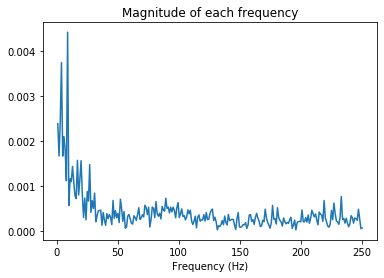

In [313]:
def compute_fft(channel, fs=128):
    N = int(len(channel)/2)
    
    fft1 = fft(channel)
    
    return fft1[range(int(N/2))]

fft1 = compute_fft(y[:int(fs*4)], fs=fs)
N = int(len(y[:int(fs*4)])/2)
f = np.linspace (0, fs, N/2)
plt.figure(1)
plt.plot (f[1:30000], abs (fft1)[1:30000])
plt.title ('Magnitude of each frequency')
plt.xlabel ('Frequency (Hz)')

Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


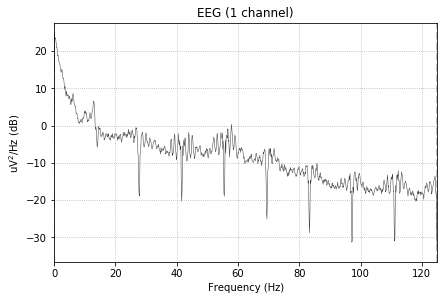

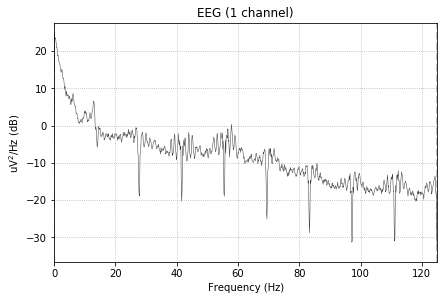

In [314]:
eeg.plot_psd(picks=1)

### Let's try and compute our own STFT with FFT per 2 second windows

In [315]:
def stft(signal, window_size=4, fs=250, channel=None, start_time=None, stop_time=None):
    if(start_time == None):
        start_time = 0
    if(stop_time == None):
        stop_time = len(signal)
    t = []
    
    window_size = int(window_size*fs)
    
    
    Z = []
    seconds = 0
    for time in range(start_time, stop_time, window_size):
        fft1 = compute_fft(signal[time:time+window_size], fs=fs)
        
        N = int(len(signal[time:time+window_size])/2)
        f = np.linspace (0, fs, fs)
        
        #average
        if(len(fft1) == fs):
            Z += [list(abs(fft1[1:]))]
            t += [seconds]
            seconds += 2
        
    return f[1:], np.transpose(np.array(Z)), t


y, times = eeg[2][:]
print(eeg.info['sfreq'])
print(len(y[0]))
print(times[-1], times[-1])
y = y[0]
f, Zxx, t = stft(y, fs=eeg.info['sfreq'])

250.0
162023
648.088 648.088


/home/david/anaconda3/envs/fmri_eeg/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


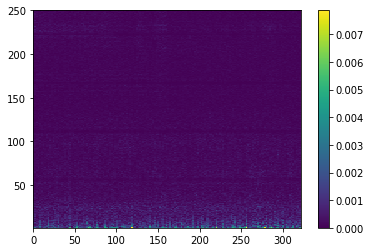

In [316]:
amplitude = np.max(Zxx)

im = plt.pcolormesh(t, f, abs(Zxx), vmin=0, vmax=amplitude)

plt.colorbar(im)
plt.show()

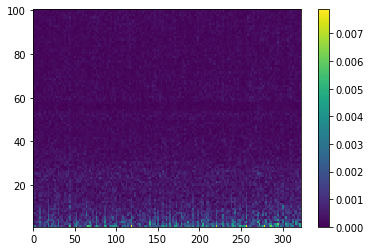

In [317]:
amplitude = np.max(Zxx[:100])

im = plt.pcolormesh(t, f[:100], abs(Zxx)[:100], vmin=0, vmax=amplitude)

plt.colorbar(im)
plt.show()